<a href="https://colab.research.google.com/github/Emanuel-Nguyen/PortfolioProjects/blob/main/Movie_correlation_I_was_WRONG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure  #this is no need

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

df=pd.read_csv(r"project.csv")

In [105]:
#observe at the table
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [106]:
#find missing
#1
#df.isna()
#2
#df[df.isna().any(axis=1)]
#3 advanced
for col in df.columns:
  pct_missing=np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [107]:
df=df.dropna() #because drop will create a coppy, so there is need to assign to the table
for col in df.columns:
  pct_missing=np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [108]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [135]:
#change data type
df['budget'].astype('int64').head()
df['gross'].astype('int64').head()



5445    2847246203
7445    2797501328
3045    2201647264
6663    2069521700
7244    2048359754
Name: gross, dtype: int64

In [130]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000.0,2.847246e+09,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000.0,2.797501e+09,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000.0,2.201647e+09,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000.0,2.069522e+09,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000.0,2.048360e+09,983,149.0,2018


In [111]:
#extract year from date using extract(pat=...) in pandas
df['correct_year']=df['released'].str.extract(pat='([0-9]{4})').astype('int64')

In [112]:
#sort
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [113]:
#how to see all the records
pd.set_option('display.max_rows',None)

In [134]:
#sort
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000.0,2.847246e+09,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000.0,2.797501e+09,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000.0,2.201647e+09,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000.0,2.069522e+09,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000.0,2.048360e+09,983,149.0,2018


In [133]:
#delete duplicate
#delete in a column
#df['company'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000.0,2.847246e+09,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000.0,2.797501e+09,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000.0,2.201647e+09,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000.0,2.069522e+09,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000.0,2.048360e+09,983,149.0,2018


In [116]:
#budget high correlation
#company high correlation


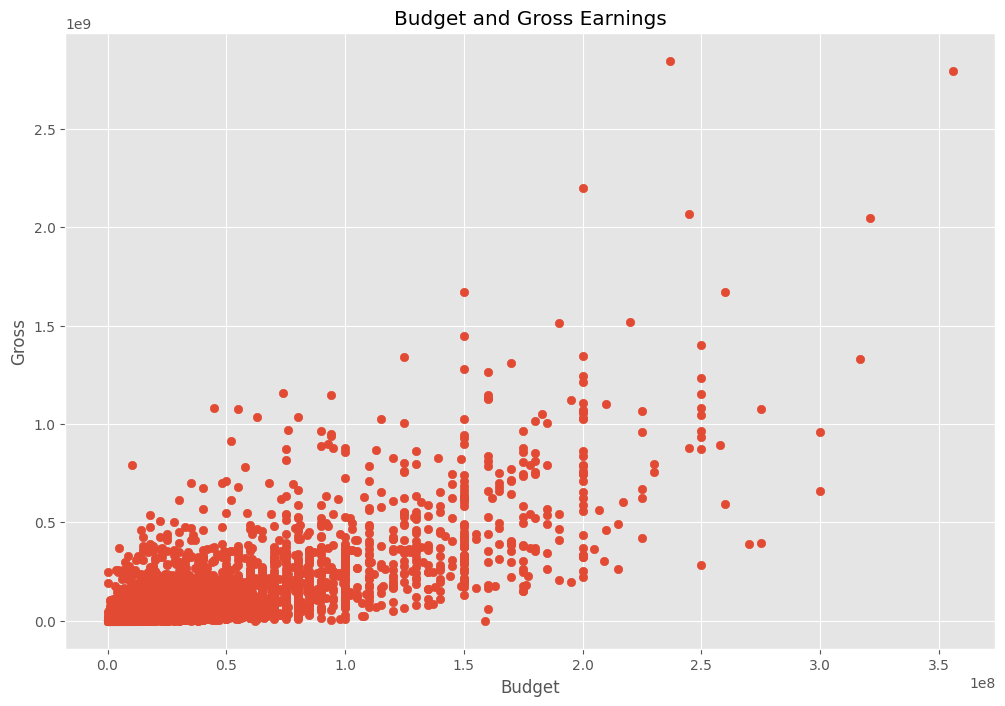

In [117]:
#scatter with buget and gross

plt.scatter(x=df['budget'],y=df['gross'])
#title
plt.title('Budget and Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [118]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

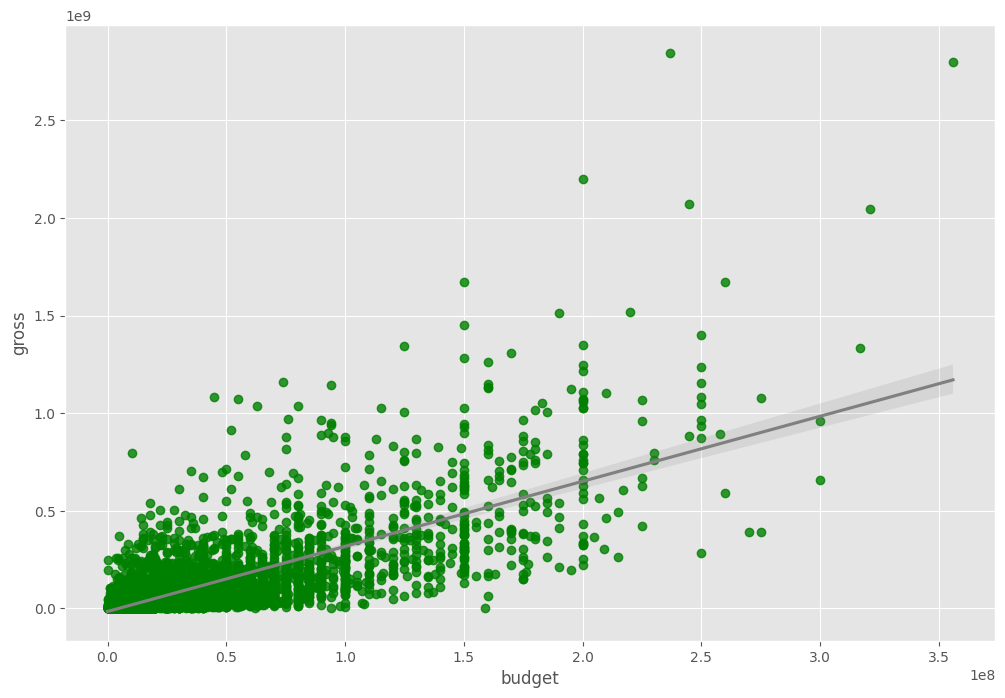

In [119]:
#regression plot using seabotn

sns.regplot(x='budget',y='gross', data=df,scatter_kws={"color":"green"},line_kws={"color":"grey"})

In [120]:
#delve into correlation

In [121]:
#SEE ALL THE correlation
df.corr(method='spearman') #pearson, kendall, spearman

<ipython-input-121-64627eea33f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman') #pearson, kendall, spearman


,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
correct_year,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


<ipython-input-122-f0ab1f9e51ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr(method='spearman')


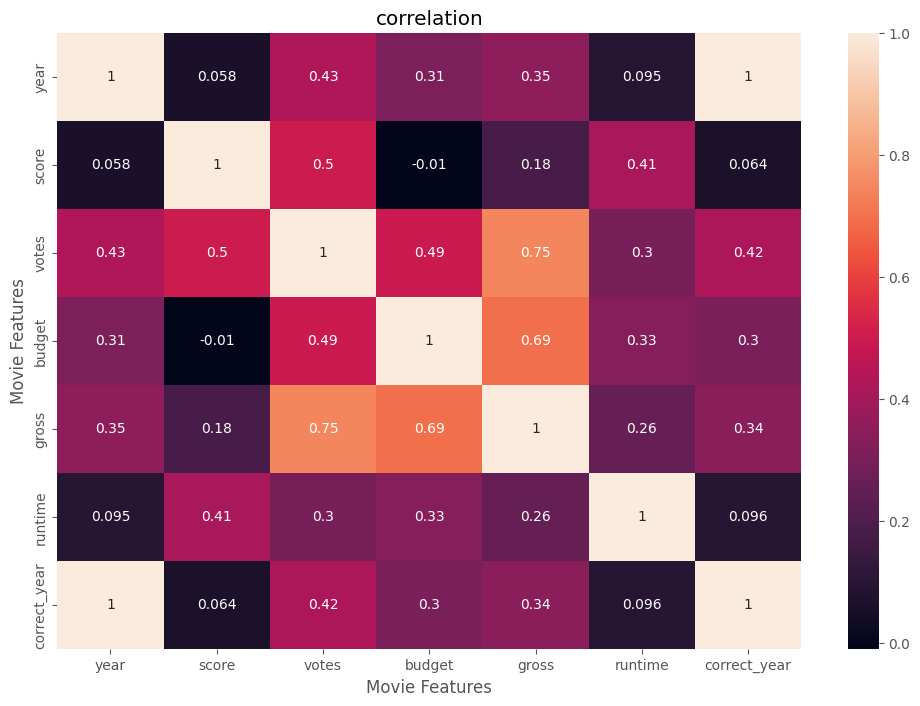

In [122]:
#create heatmap
correlation_matrix=df.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [136]:
#numerize the string columns
df_numerized=df
for col in df_numerized.columns:
  if(df_numerized[col].dtype=='object'):
    df_numerized[col]=df_numerized[col].astype('category')
    df_numerized[col]=df_numerized[col].cat.codes
df_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000.0,2.847246e+09,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000.0,2.797501e+09,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000.0,2.201647e+09,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000.0,2.069522e+09,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000.0,2.048360e+09,983,149.0,2018


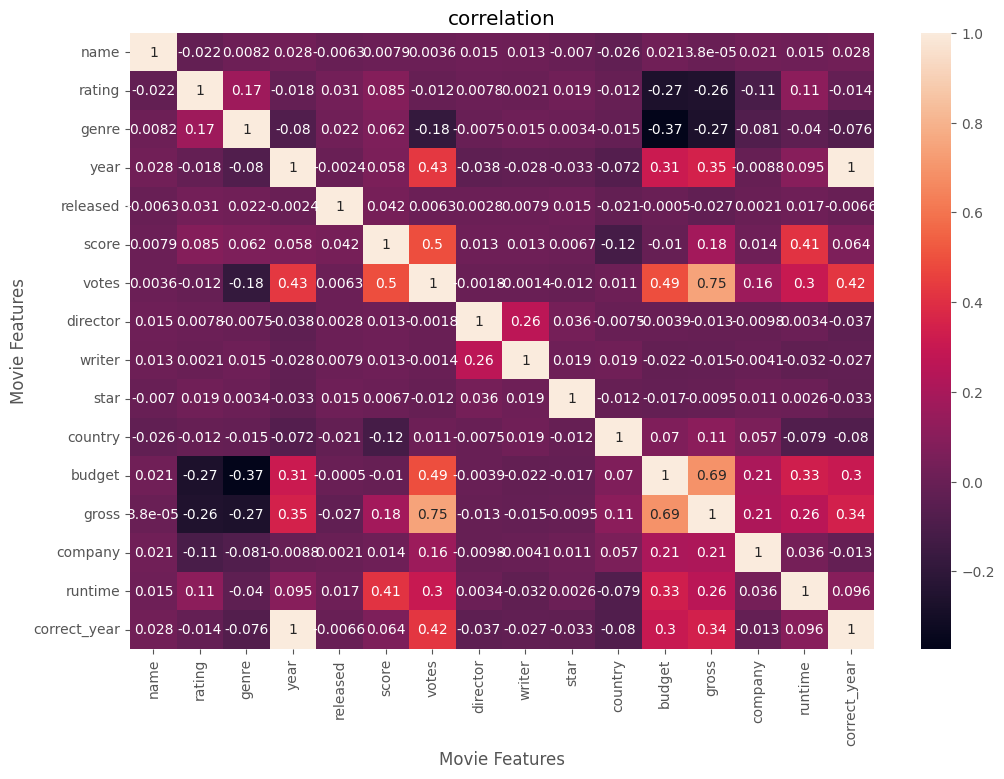

In [124]:
#create heatmap
correlation_matrix=df_numerized.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [132]:
#pair the correlation for simplicity
correlation=df_numerized.corr()
corr_pairs = correlation.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.029234
      genre       0.010996
      year        0.025542
      released   -0.006152
dtype: float64

In [131]:
corr_pairs.sort_values().head()

genre   budget   -0.368523
budget  genre    -0.368523
gross   genre    -0.244101
genre   gross    -0.244101
rating  budget   -0.203946
dtype: float64

In [127]:
#find pairs grater than 0.5
high_corr = corr_pairs[(corr_pairs)>0.5]
high_corr


name          name            1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
              correct_year    0.998726
released      released        1.000000
score         score           1.000000
votes         votes           1.000000
              gross           0.614751
director      director        1.000000
writer        writer          1.000000
star          star            1.000000
country       country         1.000000
budget        budget          1.000000
              gross           0.740247
gross         votes           0.614751
              budget          0.740247
              gross           1.000000
company       company         1.000000
runtime       runtime         1.000000
correct_year  year            0.998726
              correct_year    1.000000
dtype: float64

In [128]:
high_corr.sort_values(ascending=False)

name          name            1.000000
director      director        1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
rating        rating          1.000000
writer        writer          1.000000
star          star            1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
correct_year  correct_year    1.000000
year          correct_year    0.998726
correct_year  year            0.998726
budget        gross           0.740247
gross         budget          0.740247
votes         gross           0.614751
gross         votes           0.614751
dtype: float64

In [129]:
#votes and budget have the highest correlation to gross earnings

#i WRONG for supposing that company brands have impact on gross